In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance 
import graphviz 
import os
import pandas as pd
import numpy as np
import time
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

df =  pd.read_csv("C:/Users/student/Desktop/project/Judgement_Feature1.csv")
df

,judge_court,judge_year,judge_month,judge_index,judge_title,F_01,F_02,F_03,F_04,F_05,...,crimePredCategory,judge_crime,judge_crimeClassify,crimeCategory,Match,judge_result,judge_resultInt,judge_class,judge_class2,judge_class3
0,臺灣彰化地方法院,111,1,4,過失傷害,1,1,0,0,0,...,0,汽車駕駛人無駕駛執照駕車過失傷害罪,過失傷害,1,0,拘役參拾伍日,35,2,1,1
1,臺灣彰化地方法院,111,1,6,傷害致重傷害,0,2,0,0,0,...,4,傷害人致重傷罪,傷害致重傷,4,1,有期徒刑壹年捌月,605,4,1,3
2,臺灣彰化地方法院,111,1,18,重傷害,0,0,0,0,0,...,4,傷害罪,傷害,3,0,有期徒刑陸月,180,3,1,2
3,臺灣彰化地方法院,111,1,19,傷害,0,0,0,0,0,...,0,無罪,無罪,0,1,零日,0,0,0,0
4,臺灣彰化地方法院,111,1,27,傷害,0,0,0,0,0,...,0,無罪,無罪,0,1,零日,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66178,臺灣南投地方法院,102,11,20,過失傷害,0,2,0,0,0,...,2,過失傷害人,過失傷害,1,0,拘役貳拾伍日,25,1,1,1
66179,臺灣南投地方法院,102,11,27,傷害,0,0,0,0,0,...,10,傷害罪,傷害,3,0,拘役叁拾日,30,1,1,1
66180,臺灣南投地方法院,102,12,3,業務過失傷害,1,0,0,0,0,...,2,業務上之過失傷害人,過失傷害,1,0,有期徒刑肆月,120,3,1,2
66181,臺灣南投地方法院,102,12,5,傷害等,0,0,0,0,0,...,9,傷害罪,傷害,3,0,拘役叁拾伍日,35,2,1,1


In [2]:
# 將資料依照類別分開
y1 = df.loc[:,"judge_class"]    
y1_0 = df.where(y1==0)
y1_0 = y1_0.dropna()
y1_1 = df.where(y1==1)
y1_1 = y1_1.dropna()
y1_2 = df.where(y1==2)
y1_2 = y1_2.dropna()
y1_3 = df.where(y1==3)
y1_3 = y1_3.dropna()
y1_4 = df.where(y1==4)
y1_4 = y1_4.dropna()
y1_o = df.where(y1>4)
y1_o = y1_o.dropna()
y1_o

,judge_court,judge_year,judge_month,judge_index,judge_title,F_01,F_02,F_03,F_04,F_05,...,crimePredCategory,judge_crime,judge_crimeClassify,crimeCategory,Match,judge_result,judge_resultInt,judge_class,judge_class2,judge_class3
141,臺灣彰化地方法院,111.0,5.0,110.0,傷害致死,0.0,2.0,0.0,0.0,0.0,...,10.0,傷害致人於死罪,傷害致死,5.0,0.0,有期徒刑參年陸月,1275.0,5.0,1.0,4.0
469,臺灣彰化地方法院,110.0,9.0,26.0,傷害致死,0.0,2.0,0.0,0.0,0.0,...,10.0,傷害致人於死罪,傷害致死,5.0,0.0,有期徒刑伍年,1825.0,5.0,1.0,4.0
1205,臺灣彰化地方法院,107.0,9.0,47.0,傷害致重傷害等,1.0,0.0,0.0,0.0,0.0,...,4.0,傷害致人重傷罪,傷害致重傷,4.0,1.0,有期徒刑陸年,2190.0,6.0,1.0,5.0
1250,臺灣彰化地方法院,107.0,12.0,28.0,傷害致死,0.0,0.0,0.0,0.0,0.0,...,10.0,傷害致人於死罪,傷害致死,5.0,0.0,有期徒刑柒年貳月,2615.0,6.0,1.0,5.0
1389,臺灣彰化地方法院,106.0,9.0,17.0,重傷害等,0.0,2.0,1.0,0.0,0.0,...,6.0,重傷罪,重傷害,6.0,1.0,有期徒刑伍年貳月,1885.0,6.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64138,臺灣新北地方法院,103.0,3.0,150.0,重傷害等,1.0,0.0,0.0,0.0,0.0,...,10.0,傷害致人重傷罪,傷害致重傷,4.0,0.0,有期徒刑參年捌月,1335.0,5.0,1.0,4.0
64255,臺灣新北地方法院,103.0,5.0,187.0,家暴重傷害等,1.0,0.0,0.0,0.0,0.0,...,4.0,而致重傷,過失傷害致重傷,2.0,0.0,有期徒刑陸年捌月,2430.0,6.0,1.0,5.0
64655,臺灣新北地方法院,102.0,1.0,128.0,重傷害,0.0,0.0,0.0,1.0,0.0,...,4.0,傷害致人重傷罪,傷害致重傷,4.0,1.0,有期徒刑肆年,1460.0,5.0,1.0,4.0
64855,臺灣新北地方法院,102.0,5.0,198.0,重傷害等,1.0,0.0,1.0,0.0,0.0,...,4.0,而致重傷,過失傷害致重傷,2.0,0.0,有期徒刑叁年陸月,1275.0,5.0,1.0,4.0


In [3]:
# 從每個類別資料抽樣一定數量資料合併成train set data
y1_0=y1_0.sample(400, random_state=1)
y1_1=y1_1.sample(400, random_state=1)
y1_2=y1_2.sample(400, random_state=1)
y1_3=y1_3.sample(400, random_state=1)
y1_4=y1_4.sample(400, random_state=1)
df2 = pd.concat([y1_0, y1_1, y1_2, y1_3, y1_4, y1_o],axis=0, ignore_index=True)
df2

,judge_court,judge_year,judge_month,judge_index,judge_title,F_01,F_02,F_03,F_04,F_05,...,crimePredCategory,judge_crime,judge_crimeClassify,crimeCategory,Match,judge_result,judge_resultInt,judge_class,judge_class2,judge_class3
0,臺灣南投地方法院,111.0,6.0,4.0,傷害等,0.0,0.0,0.0,0.0,0.0,...,0.0,無罪,無罪,0.0,1.0,零日,0.0,0.0,0.0,0.0
1,臺灣士林地方法院,102.0,1.0,77.0,傷害等,0.0,0.0,1.0,0.0,0.0,...,0.0,無罪,無罪,0.0,1.0,零日,0.0,0.0,0.0,0.0
2,臺灣嘉義地方法院,103.0,7.0,48.0,業務過失傷害,1.0,0.0,0.0,0.0,0.0,...,0.0,無罪,無罪,0.0,1.0,零日,0.0,0.0,0.0,0.0
3,臺灣新竹地方法院,108.0,7.0,58.0,傷害,1.0,1.0,0.0,0.0,0.0,...,10.0,無罪,無罪,0.0,0.0,零日,0.0,0.0,0.0,0.0
4,臺灣臺南地方法院,111.0,8.0,48.0,家暴傷害等,1.0,0.0,0.0,0.0,0.0,...,10.0,無罪,無罪,0.0,0.0,零日,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,臺灣新北地方法院,103.0,3.0,150.0,重傷害等,1.0,0.0,0.0,0.0,0.0,...,10.0,傷害致人重傷罪,傷害致重傷,4.0,0.0,有期徒刑參年捌月,1335.0,5.0,1.0,4.0
2200,臺灣新北地方法院,103.0,5.0,187.0,家暴重傷害等,1.0,0.0,0.0,0.0,0.0,...,4.0,而致重傷,過失傷害致重傷,2.0,0.0,有期徒刑陸年捌月,2430.0,6.0,1.0,5.0
2201,臺灣新北地方法院,102.0,1.0,128.0,重傷害,0.0,0.0,0.0,1.0,0.0,...,4.0,傷害致人重傷罪,傷害致重傷,4.0,1.0,有期徒刑肆年,1460.0,5.0,1.0,4.0
2202,臺灣新北地方法院,102.0,5.0,198.0,重傷害等,1.0,0.0,1.0,0.0,0.0,...,4.0,而致重傷,過失傷害致重傷,2.0,0.0,有期徒刑叁年陸月,1275.0,5.0,1.0,4.0


In [4]:
X_list2 = ["F_01", "F_02", "F_03", "F_04", "F_06", "F_07", "F_08", "F_11", "F_13", "F_14", "crimePredCategory"]

X_train = df2.loc[:,X_list2]
y_train = df2.loc[:,"crimeCategory"]

y1_train = df2.loc[:,"judge_class"]
y2_train = df2.loc[:,"judge_class2"]
y3_train = df2.loc[:,"judge_class3"]
print(f'y_train類別統計:\n{y_train.value_counts()}')
print(f'y1_train類別統計:\n{y1_train.value_counts()}')
print(f'y3_train類別統計:\n{y3_train.value_counts()}')

y_train類別統計:
1.0     875
0.0     400
3.0     363
2.0     342
4.0      95
5.0      75
6.0      27
7.0      19
10.0      3
11.0      2
8.0       2
9.0       1
Name: crimeCategory, dtype: int64
y1_train類別統計:
0.0    400
1.0    400
2.0    400
3.0    400
4.0    400
5.0    120
6.0     84
Name: judge_class, dtype: int64
y3_train類別統計:
1.0    800
0.0    400
2.0    400
3.0    400
4.0    120
5.0     84
Name: judge_class3, dtype: int64


In [5]:
# 抽樣作為test set data
df3 = df.sample(650, random_state=100)
X_test = df3.loc[:, X_list2]
y_test = df3.loc[:,"crimeCategory"]

y1_test = df3.loc[:,"judge_class"]
y2_test = df3.loc[:,"judge_class2"]
y3_test = df3.loc[:,"judge_class3"]

print(f'y1_test類別統計:\n{y1_test.value_counts()}')

y1_test類別統計:
2    278
3    181
1    144
0     33
4     10
5      4
Name: judge_class, dtype: int64


### RandomForestClassifier

In [7]:
T1=time.time()

RFC = RandomForestClassifier(max_depth=10, n_estimators=1000)
RFC.fit(X_train, y_train)

y_pred_RFC = RFC.predict(X_test)

accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
num_correct_samples_RFC = accuracy_score(y_test, y_pred_RFC, normalize=False)
con_matrix_RFC = confusion_matrix(y_test, y_pred_RFC)


T2=time.time()

print('number of correct sample_RFC: {}'.format(num_correct_samples_RFC))
print('accuracy_RFC: {}'.format(accuracy_RFC))
print('con_matrix_RFC: \n{}'.format(con_matrix_RFC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_RFC: 525
accuracy_RFC: 0.8076923076923077
con_matrix_RFC: 
[[ 23   5   1   4   0   0]
 [ 27 361  22  22   0   1]
 [  2  13  11   1   0   0]
 [  9  14   0 127   4   0]
 [  0   0   0   0   2   0]
 [  0   0   0   0   0   1]]
總花費時間 : 0.02 分鐘


In [6]:
%%time
# T1=time.time()

RFC = RandomForestClassifier(max_depth=6, n_estimators=2000, criterion='entropy')
RFC.fit(X_train, y_train)

y_pred_RFC = RFC.predict(X_test)

accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
num_correct_samples_RFC = accuracy_score(y_test, y_pred_RFC, normalize=False)
con_matrix_RFC = confusion_matrix(y_test, y_pred_RFC)


# T2=time.time()

print('number of correct sample_RFC: {}'.format(num_correct_samples_RFC))
print(f'accuracy_RFC: {(accuracy_RFC)*100:.2f}%')
print('con_matrix_RFC: \n{}'.format(con_matrix_RFC))
# print(f"總花費時間 : {(T2 - T1):.2f} ")

number of correct sample_RFC: 545
accuracy_RFC: 83.85%
con_matrix_RFC: 
[[ 21   8   0   4   0   0]
 [ 22 378  10  22   0   1]
 [  0  15   9   3   0   0]
 [  5  12   0 134   1   2]
 [  0   0   0   0   2   0]
 [  0   0   0   0   0   1]]
CPU times: total: 2.08 s
Wall time: 2.08 s


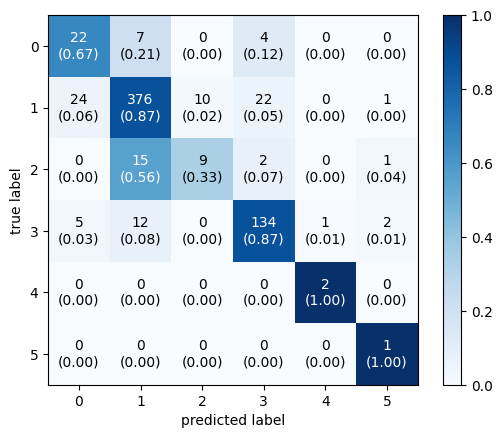

In [84]:
fig, ax = plot_confusion_matrix(conf_mat=con_matrix_RFC,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )
plt.show()

In [98]:
# 將模型匯出成pickle檔
with open("crime_name.pickle","wb") as n:
    pickle.dump(RFC, n, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
# 抽樣100組test set data計算平均準確率和標準差
T1=time.time()
accuracy_list = []
for i in range(100):
    dfi = df.sample(650)
    Xi_test = dfi.loc[:, X_list2]
    yi_test = dfi.loc[:,"crimeCategory"]
    yi_pred_RFC = RFC.predict(Xi_test)
    i_accuracy_RFC = accuracy_score(yi_test, yi_pred_RFC)
    accuracy_list.append(i_accuracy_RFC)

print(f'accuracy mean:{np.mean(accuracy_list)*100:.2f}%')
print(f'accuracy std:{np.std(accuracy_list)*100:.2f}%')
T2=time.time()
# print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

accuracy mean:81.84%
accuracy std:1.52%


In [7]:
RFC.feature_importances_

array([0.02056784, 0.10855437, 0.03519687, 0.00523136, 0.09262465,
       0.03158012, 0.05221222, 0.0216151 , 0.05050846, 0.01296627,
       0.56894274])

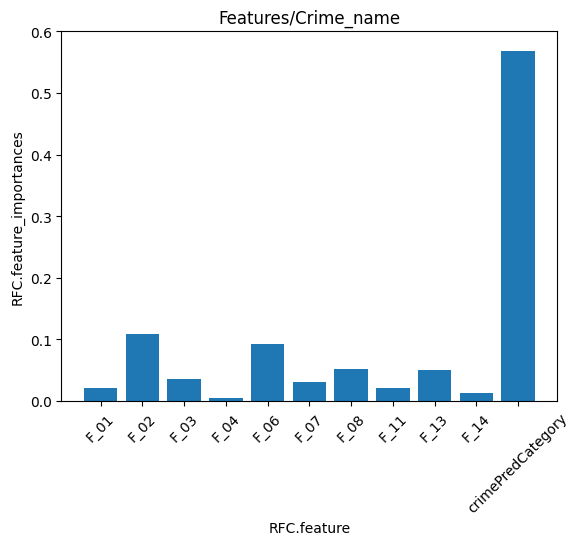

In [38]:
plt.bar(X_list2,RFC.feature_importances_)
plt.xlabel("RFC.feature")
plt.ylabel("RFC.feature_importances")
plt.xticks(rotation=45)
plt.ylim(0,0.6)
plt.title("Features/Crime_name")
plt.show()

In [17]:
# grid search挑選超參數
T1=time.time()
params = {
    'max_depth':[6, 8, 10, 15, 20,30],
    'n_estimators':[100, 500, 1000, 2000,5000,10000],
    'criterion':['gini', 'entropy']
}
grid_RFC = GridSearchCV(estimator = RFC,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5,
                        n_jobs=-1)

grid_RFC.fit(X_train, y_train)
print(grid_RFC.best_params_)
print(f'grid_RFC.score:{grid_RFC.score(X_test, y_test)*100:.2f}%')
T2=time.time()
print(f"總花費時間 : {((T2 - T1)):.2f} ")

C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 1000}
grid_RFC.score:83.54%
總花費時間 : 424.70 


In [14]:
T1=time.time()

y1RFC2 = RandomForestClassifier(max_depth=6, n_estimators=2000, criterion='entropy')
y1RFC2.fit(X_train, y1_train)

y1_pred_RFC = y1RFC2.predict(X_test)

accuracy_RFC = accuracy_score(y1_test, y1_pred_RFC)
num_correct_samples_RFC = accuracy_score(y1_test, y1_pred_RFC, normalize=False)
con_matrix_RFC = confusion_matrix(y1_test, y1_pred_RFC)


T2=time.time()

print('number of correct sample_RFC: {}'.format(num_correct_samples_RFC))
print(f'accuracy_RFC: {(accuracy_RFC)*100:.2f}%')
print('con_matrix_RFC: \n{}'.format(con_matrix_RFC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_RFC: 207
accuracy_RFC: 31.85%
con_matrix_RFC: 
[[25  3  3  0  2  0  0]
 [16 61 44  7 15  1  0]
 [28 92 96 23 38  0  1]
 [13 43 46 17 62  0  0]
 [ 0  0  2  1  7  0  0]
 [ 0  2  0  0  0  1  1]
 [ 0  0  0  0  0  0  0]]
總花費時間 : 0.03 分鐘


In [15]:
T1=time.time()

y2RFC = RandomForestClassifier(max_depth=6, n_estimators=2000, criterion='entropy')
y2RFC.fit(X_train, y2_train)

y2_pred_RFC = y2RFC.predict(X_test)

accuracy_RFC = accuracy_score(y2_test, y2_pred_RFC)
num_correct_samples_RFC = accuracy_score(y2_test, y2_pred_RFC, normalize=False)
y2_con_matrix_RFC = confusion_matrix(y2_test, y2_pred_RFC)


T2=time.time()

print('number of correct sample_RFC: {}'.format(num_correct_samples_RFC))
print(f'accuracy_RFC: {(accuracy_RFC)*100:.2f}%')
print('con_matrix_RFC: \n{}'.format(y2_con_matrix_RFC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_RFC: 619
accuracy_RFC: 95.23%
con_matrix_RFC: 
[[ 23  10]
 [ 21 596]]
總花費時間 : 0.03 分鐘


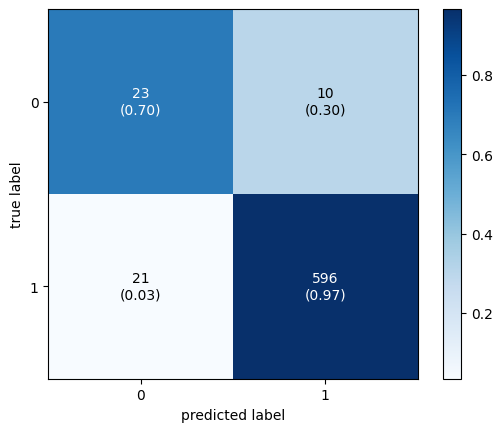

In [86]:
fig, ax = plot_confusion_matrix(conf_mat=y2_con_matrix_RFC,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )
plt.show()

In [21]:
# 計算precision和recall
from sklearn import metrics
precision = metrics.precision_score(y2_test, y2_pred_RFC)
recall = metrics.recall_score(y2_test, y2_pred_RFC)
print(f'precision_RFC: {(precision)*100:.2f}%')
print(f'recall_RFC: {(recall)*100:.2f}%')

precision_RFC: 98.35%
recall_RFC: 96.60%


In [29]:
T1=time.time()

y3RFC = RandomForestClassifier(max_depth=6, n_estimators=2000, criterion='entropy')
y3RFC.fit(X_train, y3_train)

y3_pred_RFC = y3RFC.predict(X_test)

accuracy_RFC = accuracy_score(y3_test, y3_pred_RFC)
num_correct_samples_RFC = accuracy_score(y3_test, y3_pred_RFC, normalize=False)
y3_con_matrix_RFC = confusion_matrix(y3_test, y3_pred_RFC)


T2=time.time()

print('number of correct sample_RFC: {}'.format(num_correct_samples_RFC))
print(f'accuracy_RFC: {(accuracy_RFC)*100:.2f}%')
print('con_matrix_RFC: \n{}'.format(y3_con_matrix_RFC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_RFC: 383
accuracy_RFC: 58.92%
con_matrix_RFC: 
[[ 23  10   0   0   0   0]
 [ 30 351   0  39   1   1]
 [  7 124   2  48   0   0]
 [  0   4   0   6   0   0]
 [  0   2   0   0   1   1]
 [  0   0   0   0   0   0]]
總花費時間 : 0.03 分鐘


In [17]:
T1=time.time()
params = {
    'max_depth':[6, 8, 10, 15, 20,30],
    'n_estimators':[100, 500, 1000, 2000,5000,10000],
    'criterion':['gini', 'entropy']
}
grid_RFC = GridSearchCV(estimator = y3RFC,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5,
                        n_jobs=-1)

grid_RFC.fit(X_train, y3_train)
print(grid_RFC.best_params_)
print(grid_RFC.score(X_test, y3_test))
T2=time.time()
print(f"總花費時間 : {((T2 - T1)):.2f} ")

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 10000}
0.5892307692307692
總花費時間 : 374.51 


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


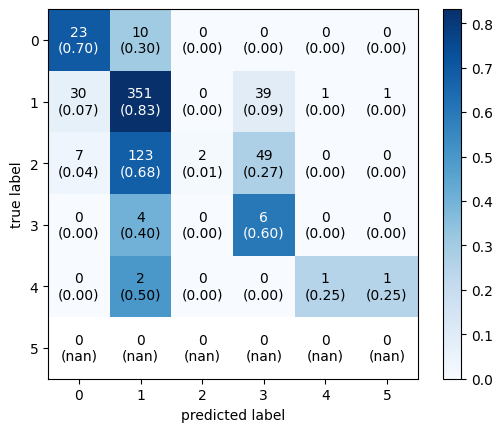

In [88]:
fig, ax = plot_confusion_matrix(conf_mat=y3_con_matrix_RFC,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )
plt.show()

In [99]:
with open("crime_time.pickle","wb") as n:
    pickle.dump(y3RFC, n, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
y3RFC.feature_importances_

array([0.02891809, 0.06711457, 0.03924677, 0.00933399, 0.16692449,
       0.04492312, 0.09721965, 0.02569676, 0.06589647, 0.01064283,
       0.44408327])

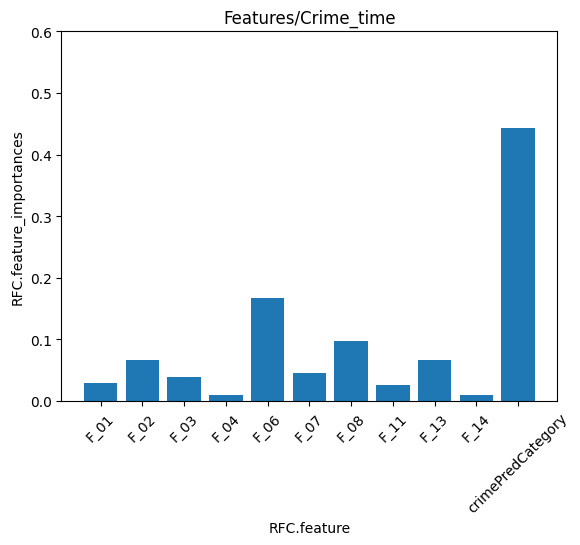

In [37]:
plt.bar(X_list2,y3RFC.feature_importances_)
plt.xlabel("RFC.feature")
plt.ylabel("RFC.feature_importances")
plt.xticks(rotation=45)
plt.ylim(0,0.6)
plt.title("Features/Crime_time")
plt.show()

In [40]:
T1=time.time()
accuracy_list = []
for i in range(100):
    dfi = df.sample(650)
    Xi_test = dfi.loc[:, X_list2]
    yi_3_test = dfi.loc[:,"judge_class3"]
    yi_3_pred_RFC = y3RFC.predict(Xi_test)
    i_accuracy_RFC = accuracy_score(yi_3_test, yi_3_pred_RFC)
    accuracy_list.append(i_accuracy_RFC)
print(accuracy_list)
print(f'yi_3_accuracy mean{np.mean(accuracy_list)*100:.2f}%')
print(f'yi_3_accuracy std{np.std(accuracy_list)*100:.2f}%')
T2=time.time()
# print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

[0.6107692307692307, 0.5646153846153846, 0.6230769230769231, 0.6046153846153847, 0.5723076923076923, 0.6, 0.5923076923076923, 0.6076923076923076, 0.563076923076923, 0.6123076923076923, 0.6076923076923076, 0.5692307692307692, 0.5723076923076923, 0.6061538461538462, 0.58, 0.5938461538461538, 0.6292307692307693, 0.5769230769230769, 0.6107692307692307, 0.5707692307692308, 0.5892307692307692, 0.6092307692307692, 0.563076923076923, 0.5707692307692308, 0.5846153846153846, 0.6169230769230769, 0.6107692307692307, 0.6138461538461538, 0.5723076923076923, 0.5846153846153846, 0.5923076923076923, 0.5738461538461539, 0.5646153846153846, 0.6046153846153847, 0.5738461538461539, 0.5815384615384616, 0.5676923076923077, 0.6030769230769231, 0.5923076923076923, 0.6107692307692307, 0.6015384615384616, 0.6015384615384616, 0.6061538461538462, 0.5984615384615385, 0.5784615384615385, 0.6030769230769231, 0.5969230769230769, 0.6092307692307692, 0.5969230769230769, 0.5953846153846154, 0.5969230769230769, 0.60615384

### 預測刑期是否在刑法刑期範圍

In [41]:
df_test=df3.loc[:,('crimeCategory')]
df_test

60700    1
35432    1
13670    1
21914    3
57077    1
        ..
62955    1
48139    3
6911     1
48265    3
3244     1
Name: crimeCategory, Length: 650, dtype: int64

In [42]:
min=[]
max=[]
for i in df_test:
    if i ==1:
        min.append(1)
        max.append(365)
    elif i ==2:
        min.append(1)
        max.append(1095)
    elif i ==3:
        min.append(1)
        max.append(1825)
    elif i ==4:
        min.append(1095)
        max.append(3650)
    elif i ==5:
        min.append(2555)
        max.append(36500)
    elif i ==6:
        min.append(1825)
        max.append(4380)
    elif i ==7:
        min.append(1825)
        max.append(4380)
    elif i ==8:
        min.append(3650)
        max.append(36500)
    elif i ==9:
        min.append(1)
        max.append(2737)
    elif i ==10:
        min.append(3832)
        max.append(36500)
    elif i ==11:
        min.append(180)
        max.append(1825)
    elif i ==0:
        min.append(0)
        max.append(0)

In [43]:
df_test=df3.loc[:,('crimeCategory', 'judge_resultInt')]

In [44]:
df_test['crime_min']=min
df_test['crime_max']=max
df_test

,crimeCategory,judge_resultInt,crime_min,crime_max
60700,1,20,1,365
35432,1,40,1,365
13670,1,120,1,365
21914,3,50,1,1825
57077,1,60,1,365
...,...,...,...,...
62955,1,180,1,365
48139,3,30,1,1825
6911,1,50,1,365
48265,3,15,1,1825


In [45]:
df_test['prediction']=y3_pred_RFC
df_test

,crimeCategory,judge_resultInt,crime_min,crime_max,prediction
60700,1,20,1,365,1.0
35432,1,40,1,365,1.0
13670,1,120,1,365,3.0
21914,3,50,1,1825,1.0
57077,1,60,1,365,3.0
...,...,...,...,...,...
62955,1,180,1,365,3.0
48139,3,30,1,1825,1.0
6911,1,50,1,365,1.0
48265,3,15,1,1825,1.0


In [46]:
predict=df_test.loc[:,'prediction']
predict

60700    1.0
35432    1.0
13670    3.0
21914    1.0
57077    3.0
        ... 
62955    3.0
48139    1.0
6911     1.0
48265    1.0
3244     1.0
Name: prediction, Length: 650, dtype: float64

In [47]:
pre_day=[]
for j in predict:
    if j ==0:
        pre_day.append(0)
    elif j ==1:
         pre_day.append(1)
    elif j ==2:
         pre_day.append(61)
    elif j ==3:
         pre_day.append(181)
    elif j ==4:
         pre_day.append(731)
    elif j ==5:
         pre_day.append(1826)
df_test['pre_day']=pre_day
df_test.head(20)

,crimeCategory,judge_resultInt,crime_min,crime_max,prediction,pre_day
60700,1,20,1,365,1.0,1
35432,1,40,1,365,1.0,1
13670,1,120,1,365,3.0,181
21914,3,50,1,1825,1.0,1
57077,1,60,1,365,3.0,181
9992,1,90,1,365,1.0,1
14461,3,60,1,1825,1.0,1
35380,1,6,1,365,1.0,1
12428,1,50,1,365,1.0,1
34880,1,50,1,365,1.0,1


In [48]:
acc=[]
for k in range(len(pre_day)):
    if pre_day[k]!=0:
        if pre_day[k]>=min[k] and pre_day[k]<=max[k]:
            acc.append(1)
        else:
            acc.append(0)
    elif pre_day[k]==0:
        if min[k]==0 and max[k]==0:
            acc.append(1)
        else:
            acc.append(0)
acc
print(sum(acc)/len(acc))
print(acc)

0.92
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1

### XGBClassifier

In [14]:
T1=time.time()
XGBC = XGBClassifier(n_estimators=500, learning_rate= 0.1, max_depth=15, gamma=0.3)        

XGBC.fit(X_train, y_train)

y_pred_XGBC = XGBC.predict(X_test)

accuracy_XGBC = accuracy_score(y_test, y_pred_XGBC)
num_correct_samples_XGBC = accuracy_score(y_test, y_pred_XGBC, normalize=False)
con_matrix_XGBC = confusion_matrix(y_test, y_pred_XGBC)
T2=time.time()

print('number of correct sample_XGBC: {}'.format(num_correct_samples_XGBC))
print(f'accuracy_XGBC: {(accuracy_XGBC)*100:.2f}%')
print('con_matrix_XGBC: \n{}'.format(con_matrix_XGBC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_XGBC: 519
accuracy_XGBC: 79.85%
con_matrix_XGBC: 
[[ 25   4   1   3   0   0   0]
 [ 19 357  30  27   0   0   0]
 [  0  14  12   1   0   0   0]
 [ 13  12   0 122   4   2   1]
 [  0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0]]
總花費時間 : 0.04 分鐘


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


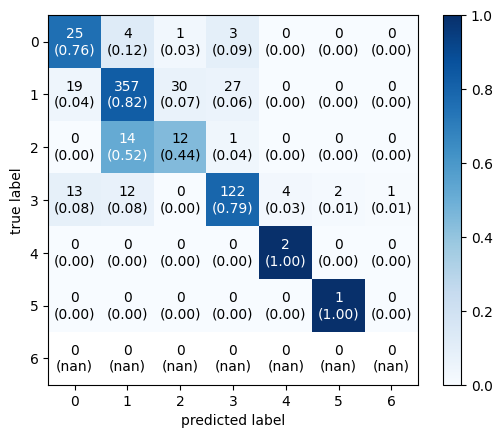

In [91]:
fig, ax = plot_confusion_matrix(conf_mat=con_matrix_XGBC,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )
plt.show()

In [50]:
T1=time.time()
accuracy_list = []
for i in range(100):
    dfi = df.sample(650)
    Xi_test = dfi.loc[:, X_list2]
    yi_test = dfi.loc[:,"crimeCategory"]
#     yi_1_test = dfi.loc[:,"judge_class"]
#     yi_2_test = dfi.loc[:,"judge_class2"]
#     yi_3_test = dfi.loc[:,"judge_class3"]
    yi_pred_XGBC = XGBC.predict(Xi_test)
    i_accuracy_XGBC = accuracy_score(yi_test, yi_pred_XGBC)
    accuracy_list.append(i_accuracy_XGBC)
print(accuracy_list)
print(f'accuracy mean{np.mean(accuracy_list)*100:.2f}%')
print(f'accuracy std{np.std(accuracy_list)*100:.2f}%')
T2=time.time()
# print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

[0.7892307692307692, 0.7707692307692308, 0.7892307692307692, 0.796923076923077, 0.7815384615384615, 0.7815384615384615, 0.7769230769230769, 0.7876923076923077, 0.7784615384615384, 0.7738461538461539, 0.7738461538461539, 0.7707692307692308, 0.7738461538461539, 0.7461538461538462, 0.7861538461538462, 0.7707692307692308, 0.7784615384615384, 0.796923076923077, 0.7738461538461539, 0.7538461538461538, 0.7846153846153846, 0.7892307692307692, 0.78, 0.7753846153846153, 0.7584615384615384, 0.7815384615384615, 0.7692307692307693, 0.7584615384615384, 0.7753846153846153, 0.7676923076923077, 0.7692307692307693, 0.7938461538461539, 0.7723076923076924, 0.82, 0.7738461538461539, 0.8046153846153846, 0.78, 0.7784615384615384, 0.7830769230769231, 0.7953846153846154, 0.7846153846153846, 0.7476923076923077, 0.7692307692307693, 0.7861538461538462, 0.7753846153846153, 0.8107692307692308, 0.78, 0.8, 0.7707692307692308, 0.7769230769230769, 0.7830769230769231, 0.7815384615384615, 0.7861538461538462, 0.7769230769

In [15]:
T1=time.time()
params = {
    'max_depth':[6, 8, 10, 15, 20],
    'n_estimators':[100, 500, 1000, 2000],
    'learning_rate':[1, 0.5, 0.3, 0.1, 0.05, 0.01],
    'gamma':[0, 0.05, 0.1, 0.3]
}
grid_XGBC = GridSearchCV(estimator = XGBC,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5)

grid_XGBC.fit(X_train, y_train)

print(grid_XGBC.best_params_)
print(f'grid_XGBC.score:{grid_XGBC.score(X_test, y_test)*100:.2f}%')

T2=time.time()
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\student\anaconda3\envs\ML_python

{'gamma': 0, 'learning_rate': 1, 'max_depth': 6, 'n_estimators': 100}
grid_XGBC.score:78.00%
總花費時間 : 142.36 分鐘


In [51]:
T1=time.time()
y1XGBC = XGBClassifier( n_estimators=500, learning_rate= 0.1, max_depth=15, gamma=0.3)        

y1XGBC.fit(X_train, y1_train)

y1_pred_XGBC = y1XGBC.predict(X_test)

accuracy_XGBC = accuracy_score(y1_test, y1_pred_XGBC)
num_correct_samples_XGBC = accuracy_score(y1_test, y1_pred_XGBC, normalize=False)
con_matrix_XGBC = confusion_matrix(y1_test, y1_pred_XGBC)
T2=time.time()

print('number of correct sample_XGBC: {}'.format(num_correct_samples_XGBC))
print(f'accuracy_XGBC: {(accuracy_XGBC)*100:.2f}%')
print('con_matrix_XGBC: \n{}'.format(con_matrix_XGBC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_XGBC: 230
accuracy_XGBC: 35.38%
con_matrix_XGBC: 
[[25  3  2  1  2  0  0]
 [15 60 33 22 12  2  0]
 [29 85 88 46 26  3  1]
 [15 36 34 48 44  3  1]
 [ 1  0  2  1  6  0  0]
 [ 0  0  0  0  0  3  1]
 [ 0  0  0  0  0  0  0]]
總花費時間 : 0.05 分鐘


In [92]:
T1=time.time()
y2XGBC = XGBClassifier( n_estimators=500, learning_rate= 0.1, max_depth=15, gamma=0.3)        

y2XGBC.fit(X_train, y2_train)

y2_pred_XGBC = y2XGBC.predict(X_test)

accuracy_XGBC = accuracy_score(y2_test, y2_pred_XGBC)
num_correct_samples_XGBC = accuracy_score(y2_test, y2_pred_XGBC, normalize=False)
y2_con_matrix_XGBC = confusion_matrix(y2_test, y2_pred_XGBC)
T2=time.time()

print('number of correct sample_XGBC: {}'.format(num_correct_samples_XGBC))
print(f'accuracy_XGBC: {(accuracy_XGBC)*100:.2f}%')
print('con_matrix_XGBC: \n{}'.format(y2_con_matrix_XGBC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_XGBC: 612
accuracy_XGBC: 94.15%
con_matrix_XGBC: 
[[ 23  10]
 [ 28 589]]
總花費時間 : 0.01 分鐘


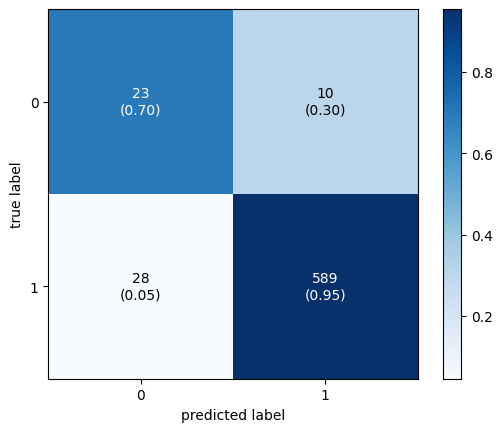

In [93]:
fig, ax = plot_confusion_matrix(conf_mat=y2_con_matrix_XGBC,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )
plt.show()

In [95]:
T1=time.time()
y3XGBC = XGBClassifier( n_estimators=500, learning_rate= 0.1, max_depth=15, gamma=0.3)        

y3XGBC.fit(X_train, y3_train)

y3_pred_XGBC = y3XGBC.predict(X_test)

accuracy_XGBC = accuracy_score(y3_test, y3_pred_XGBC)
num_correct_samples_XGBC = accuracy_score(y3_test, y3_pred_XGBC, normalize=False)
y3_con_matrix_XGBC = confusion_matrix(y3_test, y3_pred_XGBC)
T2=time.time()

print('number of correct sample_XGBC: {}'.format(num_correct_samples_XGBC))
print(f'accuracy_XGBC: {(accuracy_XGBC)*100:.2f}%')
print('con_matrix_XGBC: \n{}'.format(y3_con_matrix_XGBC))
print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

number of correct sample_XGBC: 388
accuracy_XGBC: 59.69%
con_matrix_XGBC: 
[[ 24   6   1   2   0   0]
 [ 29 322  39  27   5   0]
 [ 11  97  33  36   3   1]
 [  1   3   0   6   0   0]
 [  0   0   0   0   3   1]
 [  0   0   0   0   0   0]]
總花費時間 : 0.05 分鐘


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


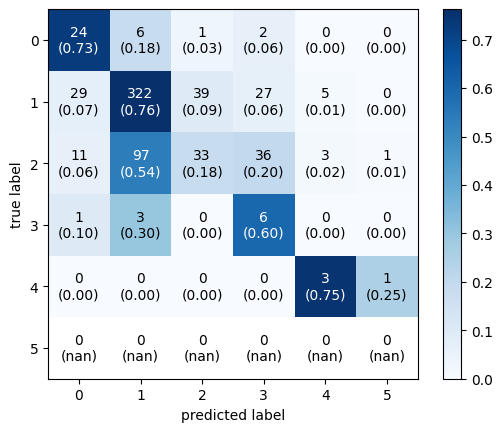

In [96]:
fig, ax = plot_confusion_matrix(conf_mat=y3_con_matrix_XGBC,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )
plt.show()

In [55]:
T1=time.time()
accuracy_list = []
for i in range(100):
    dfi = df.sample(650)
    Xi_test = dfi.loc[:, X_list2]
    yi_test = dfi.loc[:,"judge_class3"]
#     yi_1_test = dfi.loc[:,"judge_class"]
#     yi_2_test = dfi.loc[:,"judge_class2"]
#     yi_3_test = dfi.loc[:,"judge_class3"]
    yi_pred_XGBC = y3XGBC.predict(Xi_test)
    i_accuracy_XGBC = accuracy_score(yi_test, yi_pred_XGBC)
    accuracy_list.append(i_accuracy_XGBC)
print(accuracy_list)
print(f'accuracy mean{np.mean(accuracy_list)*100:.2f}%')
print(f'accuracy std{np.std(accuracy_list)*100:.2f}%')
T2=time.time()
# print(f"總花費時間 : {((T2 - T1)/60):.2f} 分鐘")

[0.5538461538461539, 0.6092307692307692, 0.5815384615384616, 0.5769230769230769, 0.54, 0.6030769230769231, 0.6107692307692307, 0.5753846153846154, 0.5446153846153846, 0.6138461538461538, 0.5984615384615385, 0.5938461538461538, 0.5892307692307692, 0.5784615384615385, 0.5876923076923077, 0.5615384615384615, 0.5769230769230769, 0.5784615384615385, 0.5538461538461539, 0.5415384615384615, 0.5907692307692308, 0.5861538461538461, 0.5861538461538461, 0.5953846153846154, 0.5723076923076923, 0.5861538461538461, 0.5784615384615385, 0.5861538461538461, 0.5769230769230769, 0.5753846153846154, 0.5784615384615385, 0.6030769230769231, 0.5892307692307692, 0.5861538461538461, 0.5507692307692308, 0.6323076923076923, 0.563076923076923, 0.5969230769230769, 0.583076923076923, 0.5753846153846154, 0.5676923076923077, 0.5692307692307692, 0.556923076923077, 0.583076923076923, 0.5861538461538461, 0.563076923076923, 0.5676923076923077, 0.5769230769230769, 0.5938461538461538, 0.5815384615384616, 0.5676923076923077

In [71]:
df_test['prediction']=y3_pred_XGBC
df_test

,crimeCategory,judge_resultInt,crime_min,crime_max,prediction,pre_day
60700,1,20,1,365,1,1
35432,1,40,1,365,2,1
13670,1,120,1,365,3,181
21914,3,50,1,1825,1,1
57077,1,60,1,365,3,181
...,...,...,...,...,...,...
62955,1,180,1,365,2,181
48139,3,30,1,1825,1,1
6911,1,50,1,365,1,1
48265,3,15,1,1825,1,1


In [72]:
predict=df_test.loc[:,'prediction']
predict

60700    1
35432    2
13670    3
21914    1
57077    3
        ..
62955    2
48139    1
6911     1
48265    1
3244     1
Name: prediction, Length: 650, dtype: int64

In [73]:
pre_day=[]
for j in predict:
    if j ==0:
        pre_day.append(0)
    elif j ==1:
         pre_day.append(1)
    elif j ==2:
         pre_day.append(61)
    elif j ==3:
         pre_day.append(181)
    elif j ==4:
         pre_day.append(731)
    elif j ==5:
         pre_day.append(1826)
df_test['pre_day']=pre_day
df_test.head(20)

,crimeCategory,judge_resultInt,crime_min,crime_max,prediction,pre_day
60700,1,20,1,365,1,1
35432,1,40,1,365,2,61
13670,1,120,1,365,3,181
21914,3,50,1,1825,1,1
57077,1,60,1,365,3,181
9992,1,90,1,365,1,1
14461,3,60,1,1825,1,1
35380,1,6,1,365,1,1
12428,1,50,1,365,1,1
34880,1,50,1,365,1,1


In [74]:
acc=[]
for k in range(len(pre_day)):
    if pre_day[k]!=0:
        if pre_day[k]>=min[k] and pre_day[k]<=max[k]:
            acc.append(1)
        else:
            acc.append(0)
    elif pre_day[k]==0:
        if min[k]==0 and max[k]==0:
            acc.append(1)
        else:
            acc.append(0)
acc
print(sum(acc)/len(acc))

0.9153846153846154


### MLP

In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [58]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.96810764
Iteration 2, loss = 1.32142187
Iteration 3, loss = 2.38818801
Iteration 4, loss = 1.41847574
Iteration 5, loss = 1.27541790
Iteration 6, loss = 1.19291950
Iteration 7, loss = 1.18693326
Iteration 8, loss = 1.16137236
Iteration 9, loss = 1.11401380
Iteration 10, loss = 1.07874185


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50, 10), learning_rate_init=0.1,
              max_iter=10, random_state=1, solver='sgd', verbose=10)

In [59]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.615245
Test set score: 0.803077


In [61]:
y_pred_mlp = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
num_correct_samples_mlp = accuracy_score(y_test, y_pred_mlp, normalize=False)
con_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print('number of correct sample_XGBC: {}'.format(num_correct_samples_mlp))
print(f'accuracy_XGBC: {(accuracy_mlp)*100:.2f}%')
print('con_matrix_XGBC: \n{}'.format(con_matrix_mlp))

number of correct sample_XGBC: 522
accuracy_XGBC: 80.31%
con_matrix_XGBC: 
[[ 23   6   0   4   0   0]
 [ 22 355   8  48   0   0]
 [  0  20   4   3   0   0]
 [  6   8   0 140   0   0]
 [  0   2   0   0   0   0]
 [  0   0   0   1   0   0]]


In [62]:
y1mlp = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [63]:
y1mlp.fit(X_train, y1_train)

Iteration 1, loss = 1.93337609
Iteration 2, loss = 1.73448101
Iteration 3, loss = 1.63916721
Iteration 4, loss = 1.56084889
Iteration 5, loss = 1.57315181
Iteration 6, loss = 1.56742320
Iteration 7, loss = 1.53306010
Iteration 8, loss = 1.50818016
Iteration 9, loss = 1.51461962
Iteration 10, loss = 1.50790407


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50, 10), learning_rate_init=0.1,
              max_iter=10, random_state=1, solver='sgd', verbose=10)

In [64]:
print("Training set score: %f" % y1mlp.score(X_train, y1_train))
print("Test set score: %f" % y1mlp.score(X_test, y1_test))

Training set score: 0.378857
Test set score: 0.341538


In [65]:
y1_pred_mlp = y1mlp.predict(X_test)

y1accuracy_mlp = accuracy_score(y1_test, y1_pred_mlp)
y1num_correct_samples_mlp = accuracy_score(y1_test, y1_pred_mlp, normalize=False)
y1con_matrix_mlp = confusion_matrix(y1_test, y1_pred_mlp)

print('number of correct sample_XGBC: {}'.format(y1num_correct_samples_mlp))
print(f'accuracy_XGBC: {(y1accuracy_mlp)*100:.2f}%')
print('con_matrix_XGBC: \n{}'.format(y1con_matrix_mlp))

number of correct sample_XGBC: 222
accuracy_XGBC: 34.15%
con_matrix_XGBC: 
[[ 23   4   4   0   2   0]
 [  8  60  62   1  13   0]
 [ 15  80 132   3  48   0]
 [  5  49  64   1  62   0]
 [  0   1   3   0   6   0]
 [  0   3   0   0   1   0]]


In [66]:
y3mlp = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [67]:
y3mlp.fit(X_train, y3_train)

Iteration 1, loss = 1.63009345
Iteration 2, loss = 1.58743447
Iteration 3, loss = 1.47765069
Iteration 4, loss = 1.41458223
Iteration 5, loss = 1.38785553
Iteration 6, loss = 1.36283426
Iteration 7, loss = 1.36065060
Iteration 8, loss = 1.43381308
Iteration 9, loss = 1.40773551
Iteration 10, loss = 1.39869712


C:\Users\student\anaconda3\envs\ML_pythone3_9\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50, 10), learning_rate_init=0.1,
              max_iter=10, random_state=1, solver='sgd', verbose=10)

In [68]:
print("Training set score: %f" % y3mlp.score(X_train, y3_train))
print("Test set score: %f" % y3mlp.score(X_test, y3_test))

Training set score: 0.449183
Test set score: 0.655385


In [69]:
y3_pred_mlp = y3mlp.predict(X_test)

y3accuracy_mlp = accuracy_score(y3_test, y3_pred_mlp)
y3num_correct_samples_mlp = accuracy_score(y3_test, y3_pred_mlp, normalize=False)
y3con_matrix_mlp = confusion_matrix(y3_test, y3_pred_mlp)

print('number of correct sample_XGBC: {}'.format(y3num_correct_samples_mlp))
print(f'accuracy_XGBC: {(y3accuracy_mlp)*100:.2f}%')
print('con_matrix_XGBC: \n{}'.format(y3con_matrix_mlp))

number of correct sample_XGBC: 426
accuracy_XGBC: 65.54%
con_matrix_XGBC: 
[[ 23  10   0   0   0]
 [ 19 403   0   0   0]
 [  5 176   0   0   0]
 [  0  10   0   0   0]
 [  0   4   0   0   0]]
